In [98]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 

In [99]:
Airfares = pd.read_csv('Airfares.csv')
BostonHousing = pd.read_csv('BostonHousing.csv')
ApplianceShipments = pd.read_csv('ApplianceShipments.csv')
ToyotaCorolla = pd.read_csv('ToyotaCorolla.csv')

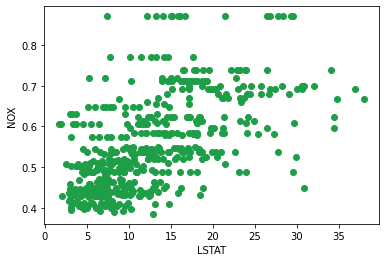

In [100]:
# 1.1
plt.scatter(BostonHousing.LSTAT, BostonHousing.NOX, c='#1E9E47')

plt.xlabel("LSTAT")
plt.ylabel("NOX")
plt.show()

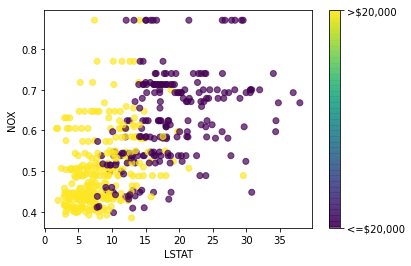

In [101]:
# 1.2
BostonHousing.loc[BostonHousing.MEDV<=20, 'f2'] = 0
BostonHousing.loc[BostonHousing.MEDV>20, 'f2'] = 1
plt.scatter(BostonHousing.LSTAT, BostonHousing.NOX, c=BostonHousing.f2, alpha=0.7)

plt.xlabel("LSTAT")
plt.ylabel("NOX")

cbar = plt.colorbar(ticks=[0,1])
cbar.set_ticklabels(['<=$20,000','>$20,000'])

plt.show()

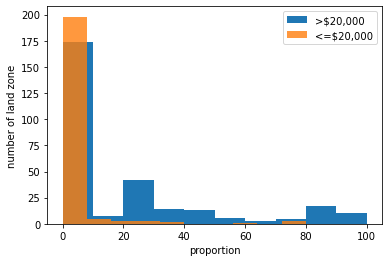

In [102]:
# 1.3
num_bins = 10   #two histgram don't need to share the same bin size
plt.hist(BostonHousing.ZN[BostonHousing.MEDV>20],num_bins)
plt.hist(BostonHousing.ZN[BostonHousing.MEDV<=20],num_bins,alpha=0.8)
plt.xlabel("proportion")
plt.ylabel("number of land zone")
plt.legend(['>$20,000', '<=$20,000'])
plt.show()

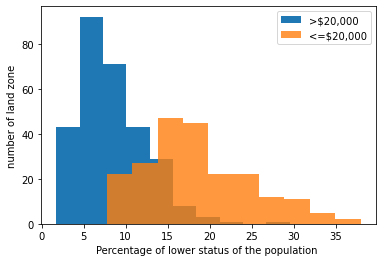

In [103]:
# 1.4
num_bins = 10   #two histgram don't need to share the same bin size
plt.hist(BostonHousing.LSTAT[BostonHousing.MEDV>20],num_bins)
plt.hist(BostonHousing.LSTAT[BostonHousing.MEDV<=20],num_bins,alpha=0.8)
plt.xlabel("Percentage of lower status of the population ")
plt.ylabel("number of land zone")
plt.legend(['>$20,000', '<=$20,000'])
plt.show()

In [104]:
# 1.6
# 1
print("The number of tracts whose median value is larger than $20,000. ",len(BostonHousing.index[BostonHousing.MEDV>20]))

# 2
print("The number of tracts bounding Charles River. ",len(BostonHousing.index[BostonHousing.CHAS==1]))

# 3
print("The average PTRATOP (pupil-teacher ratio by town) of all tracts bounding Charles River. ",np.mean(BostonHousing.PTRATIO[BostonHousing.CHAS==1]))

The number of tracts whose median value is larger than $20,000.  291
The number of tracts bounding Charles River.  35
The average PTRATOP (pupil-teacher ratio by town) of all tracts bounding Charles River.  17.49142857142857


In [105]:
#===========================================================

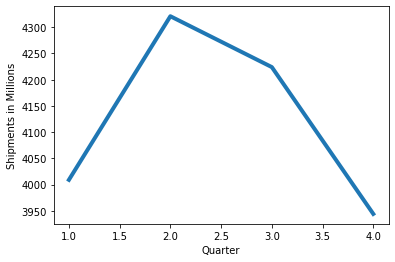

In [106]:
# 2.1 ApplianceShipments
plt.plot(ApplianceShipments.Quarter[ApplianceShipments.Year==1985],ApplianceShipments.Shipments[ApplianceShipments.Year==1985], linewidth=4)
plt.xlabel("Quarter")
plt.ylabel("Shipments in Millions")
plt.show()

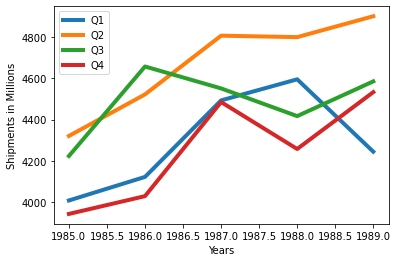

In [107]:
# 2.2
plt.plot(ApplianceShipments.Year[ApplianceShipments.Quarter==1],ApplianceShipments.Shipments[ApplianceShipments.Quarter==1] ,linewidth=4)
plt.plot(ApplianceShipments.Year[ApplianceShipments.Quarter==2],ApplianceShipments.Shipments[ApplianceShipments.Quarter==2] ,linewidth=4)
plt.plot(ApplianceShipments.Year[ApplianceShipments.Quarter==3],ApplianceShipments.Shipments[ApplianceShipments.Quarter==3] ,linewidth=4)
plt.plot(ApplianceShipments.Year[ApplianceShipments.Quarter==4],ApplianceShipments.Shipments[ApplianceShipments.Quarter==4] ,linewidth=4)

plt.xlabel("Years")
plt.ylabel("Shipments in Millions")

plt.legend(['Q1','Q2','Q3','Q4'])
plt.show()

In [150]:
# 2.3

# plt.plot(ApplianceShipments.Year, ApplianceShipment.groupby('Year')['Shipments'].sum(), linewidth=4)
x = ['1985','1986','1987','1088','1989']
y = ['16498','17332','18335','18069','18263']

years = np.unique(ApplianceShipments.Year)
a = np.array(ApplianceShipments.Shipments)
# sums=[]
# for y in yearApplianceShipments:
#     sums.append(ApplianceShipments[ApplianceShipments.Year==y].sum())
sums = np.bincount(ApplianceShipments.Year, weights=ApplianceShipments.Shipments)
# plt.plot(yearApplianceShipments,sums, linewidth=4)
# plt.plot(x,y, linewidth=4)

plt.xlabel("Year")
plt.ylabel("Shipments in Millions")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1990,)

In [109]:
# =============================================


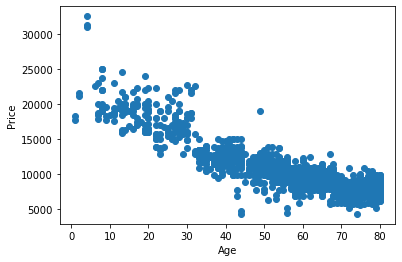

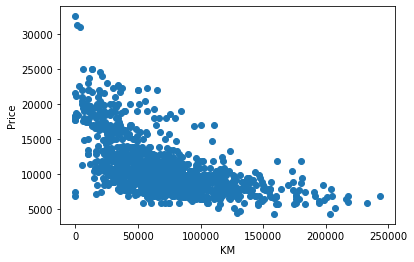

In [110]:
# 3.2 ToyotaCorolla
plt.scatter(ToyotaCorolla.Age, ToyotaCorolla.Price)

plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

plt.scatter(ToyotaCorolla.KM, ToyotaCorolla.Price)

plt.xlabel("KM")
plt.ylabel("Price")
plt.show()

In [111]:
# 3.3
from sklearn.model_selection import train_test_split
select_index = ['Age', 'KM']
car_X = ToyotaCorolla.loc[:, select_index]
# car_y = ToyotaCorolla.Price
car_y = ToyotaCorolla.loc[:, 'Price']

X_train, X_valid, y_train, y_valid = \
    train_test_split(car_X, car_y, test_size = 0.8, random_state=77)


In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [113]:
model.fit(X_train,y_train)
np.set_printoptions(precision=4, suppress=True) 
print(model.coef_) 
print('%.4f' % model.intercept_ )

[-161.1872   -0.0214]
21293.1287


In [114]:
# 3.4
model.predict([[48,41636]])

array([12663.8515])

In [115]:
y_pred = model.predict(X_valid)

In [116]:
# 3.5 
e = y_valid - y_pred 
mae = np.mean( np.abs(e)) 
print( mae)


1243.4482914398293


In [117]:
# 3.6
# make predictions on training set 
y_pred_train = model.predict(X_train)
e = y_train - y_pred_train # compute rmse 
mae_train = np.mean( np.abs(e)) 
print( mae_train )

1251.0965938249547


In [118]:
# ============================================

In [120]:
print(Airfares.columns.values)

['COUPON' 'NEW' 'SW' 'HI' 'S_INCOME' 'E_INCOME' 'S_POP' 'E_POP' 'DISTANCE'
 'PAX' 'FARE']


In [132]:
# 4.1   Airfares
select_index = ['NEW','PAX','COUPON',  'SW', 'HI', 'S_INCOME','E_INCOME', 'S_POP', 'E_POP', 'DISTANCE']
# select_index = ['COUPON', 'NEW', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE','PAX']
air_X = Airfares.loc[:, select_index]
air_y = Airfares.loc[:, 'FARE']

X_train, X_valid, y_train, y_valid = \
    train_test_split(air_X, air_y, test_size = 0.7, random_state=22)

In [133]:
model.fit(X_train,y_train)

LinearRegression()

In [134]:
print(model.coef_)

[ -1.1505  -0.0015  31.2759 -41.9723   0.0059   0.002    0.0027   0.
   0.       0.0517]


In [135]:
# 4.2
model.predict([[3, 12782, 1.202, 0, 4442.141, 28760, 27664, 4557004, 3195503, 1976]])

array([223.071])

In [142]:
# 4.3
model.predict([[3, 12782, 1.202, 1, 4442.141, 28760, 27664, 4557004, 3195503, 1976]])

array([181.0987])

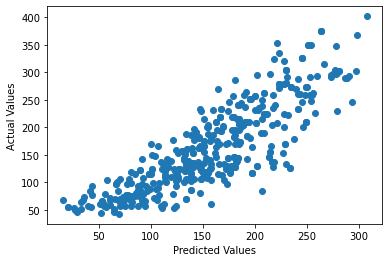

In [139]:
# 4.4
y_pred = model.predict(X_valid)

plt.scatter(y_pred, y_valid)

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()



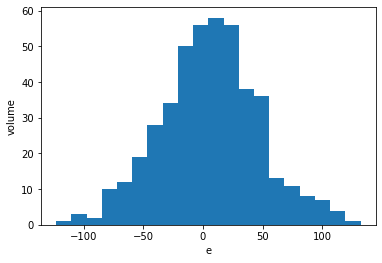

In [141]:
# 4.5
e = y_valid - y_pred
num_bins = 20   #two histgram don't need to share the same bin size
plt.hist(e,num_bins)

plt.xlabel("e")
plt.ylabel("volume")

plt.show()

In [ ]:
# 4.6
